# Principal Component Analysis with Cancer Data

In [0]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cancer_df = pd.read_csv('/content/drive/My Drive/AIML_NoteBooks/LabAndAssignments/breast-cancer-wisconsin-data.csv');
cancer_df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done
  
  cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [0]:
X = cancer_df.drop(['ID'],axis=1)
y= cancer_df['Class']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [0]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
print('Missing values:\n{}'.format(X.isnull().sum()))
X_cleaned = X.drop(X[X['Bare Nuclei'] == '?'].index  )
X_cleaned.shape
X_cleaned =X_cleaned.dropna() 
X_cleaned.shape

Missing values:
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64


(683, 10)

In [0]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
X['Bare Nuclei'][X['Bare Nuclei'] == '?'].count()

16

In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
X = X.replace('?', np.nan)

X = X.apply(lambda X: X.fillna(X.median()),axis=0)

X = X.apply(lambda X: X.fillna(X.mode()),axis=0)


In [0]:
X[X.duplicated()== True].count()

ClumpThickness                 236
Cell Size                      236
Cell Shape                     236
Marginal Adhesion              236
Single Epithelial Cell Size    236
Bare Nuclei                    236
Normal Nucleoli                236
Bland Chromatin                236
Mitoses                        236
Class                          236
dtype: int64

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [0]:
# Check for correlation of variable
X_cleaned.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.553742,0.534066,0.350957,0.714790
Cell Size,0.642481,1.000000,0.907228,0.706977,0.753544,0.755559,0.719346,0.460755,0.820801
Cell Shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,0.523596,0.753544,0.722462,0.594548,1.000000,0.618128,0.628926,0.480583,0.690958
Normal Nucleoli,0.553742,0.755559,0.735344,0.668567,0.618128,1.000000,0.665602,0.346011,0.758228
Bland Chromatin,0.534066,0.719346,0.717963,0.603121,0.628926,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.758228,0.718677,0.423448,1.000000


In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

/usr/local/lib/python2.7/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python2.7/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python2.7/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


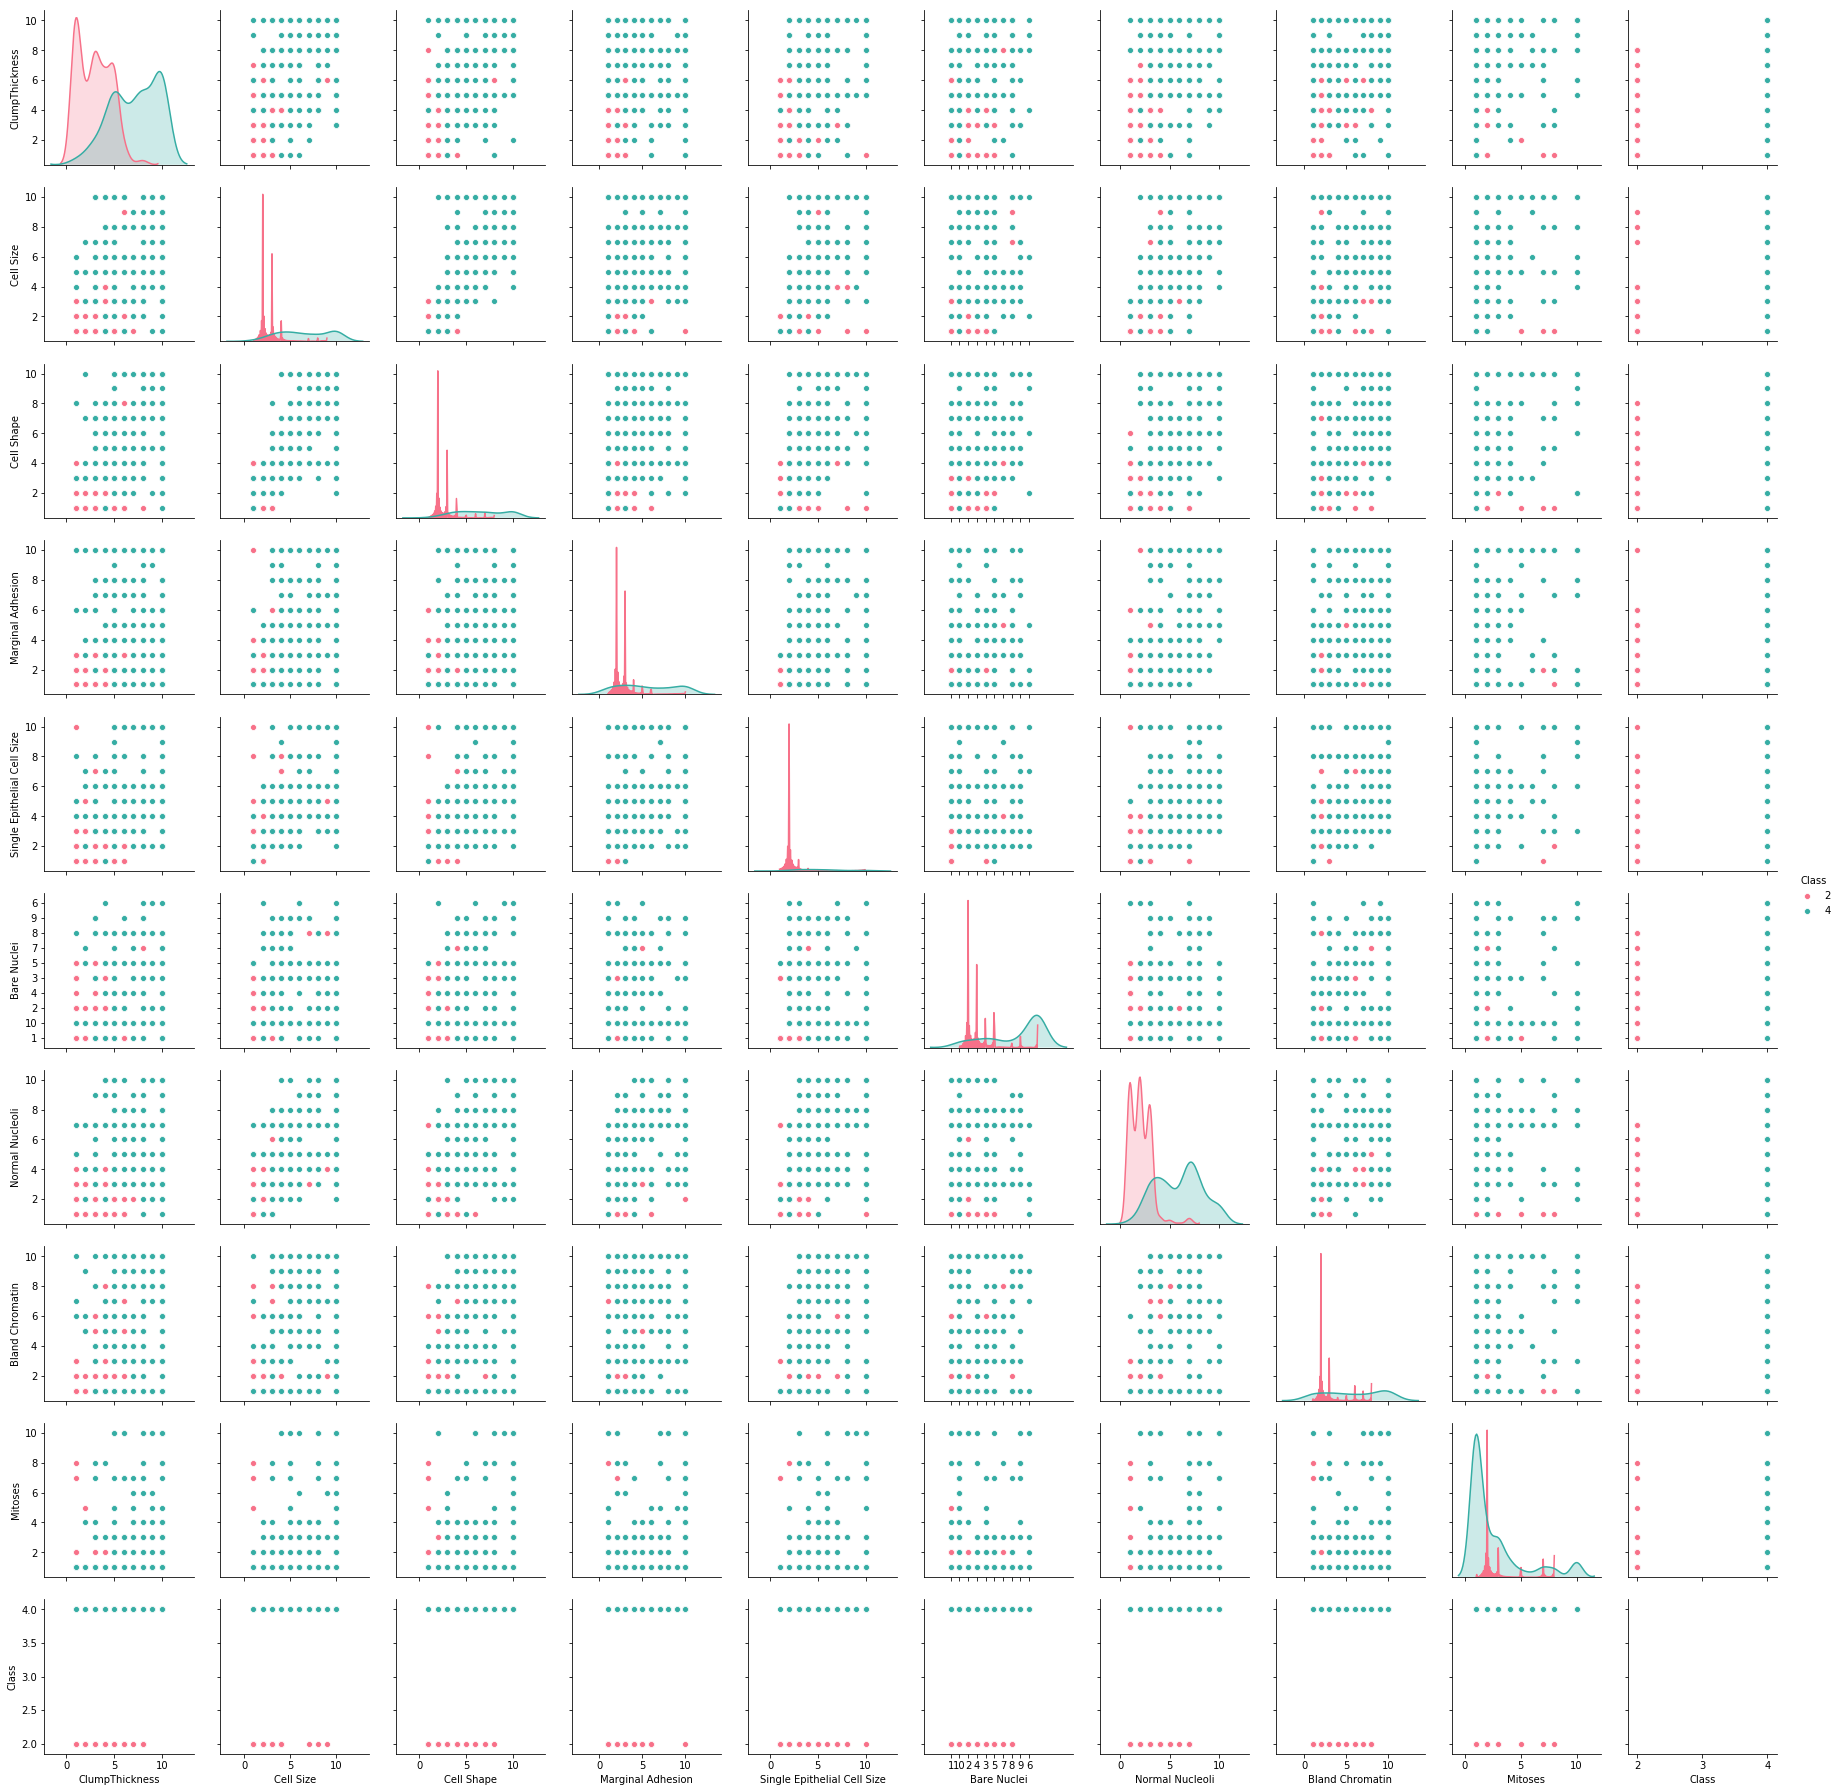

In [0]:
sns.pairplot(X_cleaned,hue= 'Class' ,palette='husl') 

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [0]:
# We could see most of the outliers are now removed.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 683 non-null int64
Cell Size                      683 non-null int64
Cell Shape                     683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null int64
Normal Nucleoli                683 non-null int64
Bland Chromatin                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(10)
memory usage: 78.7 KB


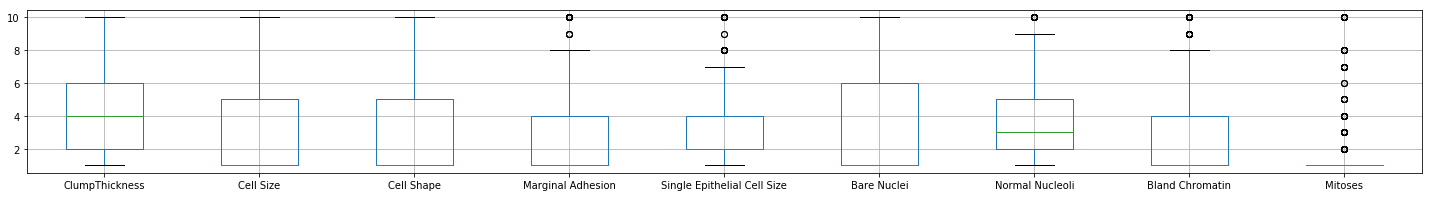

In [0]:
X_cleaned['Bare Nuclei'] = X_cleaned['Bare Nuclei'].astype('int')
X_cleaned.info()
X_cleaned_final = X_cleaned.drop(['Class'], axis =1)
X_cleaned_final.boxplot(figsize=(25,3))

# Q6 Create a covariance matrix for identifying Principal components

In [0]:
# PCA
# Step 1 - Create covariance matrix


In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled =  sc.fit_transform(X_cleaned_final)          
cov_matrix = np.cov(X_scaled.T)
cov_matrix

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[1.00146628, 0.64342355, 0.65442815, 0.48854401, 0.52436377,
        0.59396107, 0.55455439, 0.534849  , 0.35147177],
       [0.64342355, 1.00146628, 0.90855848, 0.70801357, 0.75464892,
        0.69272299, 0.75666702, 0.7204008 , 0.46143029],
       [0.65442815, 0.90855848, 1.00146628, 0.68695385, 0.72352174,
        0.71492429, 0.73642172, 0.71901615, 0.44190459],
       [0.48854401, 0.70801357, 0.68695385, 1.00146628, 0.59541954,
        0.67163165, 0.66954737, 0.6040054 , 0.41951256],
       [0.52436377, 0.75464892, 0.72352174, 0.59541954, 1.00146628,
        0.58657495, 0.61903424, 0.62984858, 0.48128796],
       [0.59396107, 0.69272299, 0.71492429, 0.67163165, 0.58657495,
        1.00146628, 0.68161283, 0.58513691, 0.33970781],
       [0.55455439, 0.75666702, 0.73642172, 0.66954737, 0.61903424,
        0.68161283, 1.00146628, 0.66657749, 0.34651824],
       [0.534849  , 0.7204008 , 0.71901615, 0.6040054 , 0.62984858,
        0.58513691, 0.66657749, 1.00146628, 0.43439328],


# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [0]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eig_vecs)
print('Eigen Values \n', eig_vals)

('Eigen Vectors \n', array([[-3.02062573e-01, -1.40800531e-01,  8.66372452e-01,
         2.74743825e-03,  1.07828438e-01,  8.03212439e-02,
        -2.47707288e-01,  2.42517517e-01, -8.51566756e-03],
       [-3.80792973e-01, -4.66403106e-02, -1.99378011e-02,
         7.33210938e-01, -2.04255399e-01, -1.45652870e-01,
         4.36299814e-01,  1.39031681e-01, -2.05434260e-01],
       [-3.77582540e-01, -8.24224677e-02,  3.35108706e-02,
        -6.67480798e-01, -1.75865604e-01, -1.08391546e-01,
         5.82726744e-01,  7.45271259e-02, -1.27209198e-01],
       [-3.32723572e-01, -5.20943760e-02, -4.12647341e-01,
        -4.60192106e-02,  4.93172568e-01, -1.95689775e-02,
        -1.63434032e-01,  6.54628771e-01,  1.23830400e-01],
       [-3.36234038e-01,  1.64404385e-01, -8.77425288e-02,
        -6.68906225e-02, -4.27383577e-01, -6.36693247e-01,
        -4.58669096e-01, -6.93089143e-02,  2.11018210e-01],
       [-3.35067511e-01, -2.61260621e-01,  6.91477953e-04,
         7.65102933e-02,  4.98

# Q8 Find variance and cumulative variance by each eigen vector

In [0]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [0]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

('Cumulative Variance Explained', array([ 65.54999277,  74.17162483,  80.16331638,  85.2702881 ,
        89.49557508,  92.84975787,  96.12089914,  99.01796423,
       100.        ]))


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [0]:
eigenvalues = eig_vals
eigenvectors = eig_vecs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

P_reduce = np.array(eigvectors_sorted[0:4])

X_std_4D = np.dot(X_cleaned_final,P_reduce.T)

Proj_data_df = pd.DataFrame(X_std_4D)

[(5.908149641714723, array([-0.30206257, -0.38079297, -0.37758254, -0.33272357, -0.33623404,
       -0.33506751, -0.34574737, -0.33559138, -0.2302064 ])), (0.7770846371660384, array([-0.14080053, -0.04664031, -0.08242247, -0.05209438,  0.16440439,
       -0.26126062, -0.22807676,  0.03396582,  0.90555729])), (0.5400429320713797, array([ 8.66372452e-01, -1.99378011e-02,  3.35108706e-02, -4.12647341e-01,
       -8.77425288e-02,  6.91477953e-04, -2.13071845e-01, -1.34248356e-01,
        8.04921698e-02])), (0.4603013949329059, array([ 0.10782844, -0.2042554 , -0.1758656 ,  0.49317257, -0.42738358,
        0.49861767,  0.01304734, -0.41711347,  0.25898781])), (0.38083341790166486, array([ 0.08032124, -0.14565287, -0.10839155, -0.01956898, -0.63669325,
       -0.12477294,  0.22766572,  0.69021015,  0.10504168])), (0.30231908501855703, array([ 0.24251752,  0.13903168,  0.07452713,  0.65462877, -0.06930891,
       -0.60922054, -0.29889733, -0.0215182 , -0.14834515])), (0.294834390235647, array

In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_explained) 



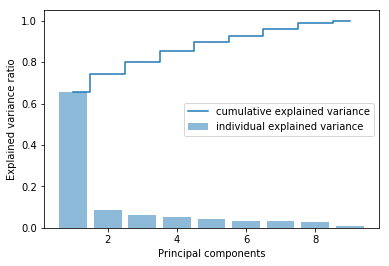

In [0]:
import matplotlib.pyplot as plt 
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [0]:
P_reduce = np.array(eigvectors_sorted[0:4])

X_std_4D = np.dot(X_cleaned_final,P_reduce.T)

Proj_data_df = pd.DataFrame(X_std_4D) 

# Q10 Find correlation between components and features

In [0]:
Proj_data_df  = Proj_data_df.join(y)

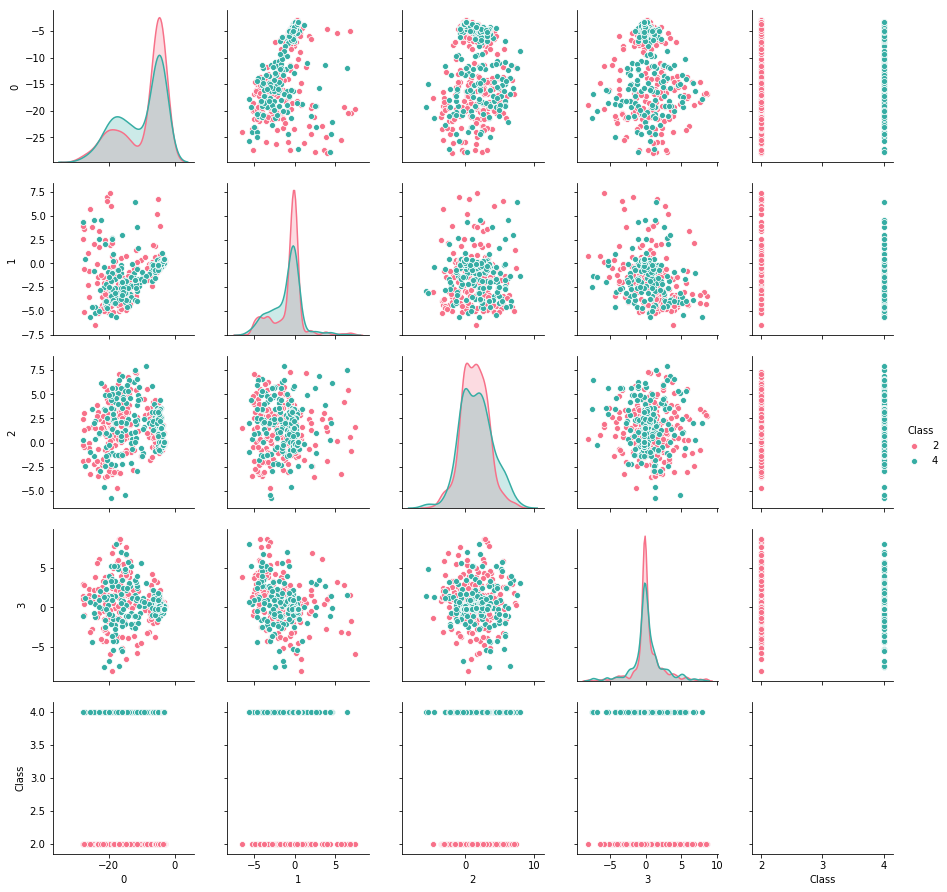

In [0]:
sns.pairplot(Proj_data_df,hue="Class", palette="husl")